In [1]:
from scipy.stats import (
    uniform, norm, chi2,
)

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact
import ipywidgets as widgets
%matplotlib widget

size = 100000
nbins = 100

interactive(children=(FloatSlider(value=0.2, description='a', max=0.5, step=0.01), FloatSlider(value=0.8, desc…

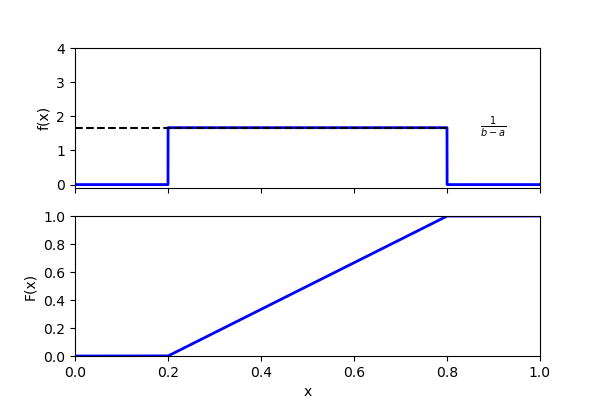

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
left = 0
right = 1

@interact(a=widgets.FloatSlider(min=left, max=right/2, step=0.01, value=0.2), b=widgets.FloatSlider(min=right/2, max=right, step=0.01, value=0.8))
def plot(a, b):
    frozen = uniform(loc=a, scale=b-a)
    x = np.linspace(left, right, size)
    fx = frozen.pdf(x)
    Fx = frozen.cdf(x)
    ax1.clear()
    ax2.clear()
    ax2.set_xlim(left, right)
    ax1.set_ylim(-0.1, 4)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel('F(x)')
    ax1.plot(x, fx, color='b', linestyle='-', linewidth=2)
    ax2.plot(x, Fx, color='b', linestyle='-', linewidth=2)
    ax1.hlines(1/(b-a), 0, b, color='k', linestyle='--')
    ax1.annotate('$\\frac{1}{b-a}$', xy=(0.9, 1/(b-a)), horizontalalignment='center', verticalalignment='center')
    mean, variance = uniform.stats(a, b-a, moments='mv')
    print('mean = {:.3f}, variance = {:.3f}'.format(mean, variance))



interactive(children=(FloatSlider(value=0.0, description='mean', max=1.0, min=-1.0), FloatSlider(value=0.1, de…

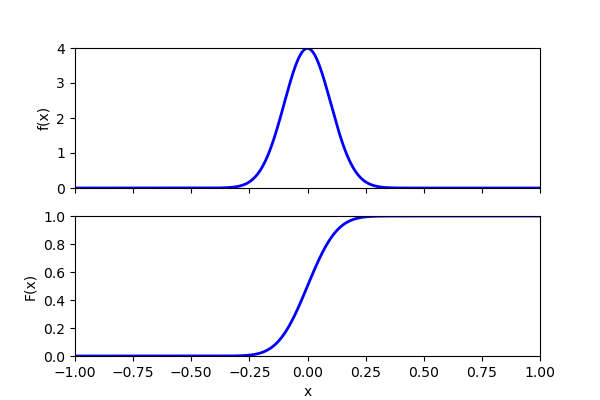

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
left = -1
right = 1

@interact(mean=widgets.FloatSlider(min=left, max=right, step=0.1, value=0), std=widgets.FloatSlider(min=0.001, max=0.5, step=0.01, value=0.1))
def plot_distribution(mean, std):
    frozen = norm(loc=mean, scale=std)
    x = np.linspace(left, right, size)
    fx = frozen.pdf(x)
    Fx = frozen.cdf(x)
    ax1.clear()
    ax2.clear()
    ax1.set_xlim(left, right)
    ax2.set_xlim(left, right)
    ax1.set_ylim(0, 4)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel('F(x)')
    ax1.plot(x, fx, color='b', linestyle='-', linewidth=2)
    ax2.plot(x, Fx, color='b', linestyle='-', linewidth=2)
    mean, variance = norm.stats(mean, std, moments='mv')
    print('mean = {:.3f}, variance = {:.3f}'.format(mean, variance))

interactive(children=(IntSlider(value=1, description='dof', max=30, min=1), Output()), _dom_classes=('widget-i…

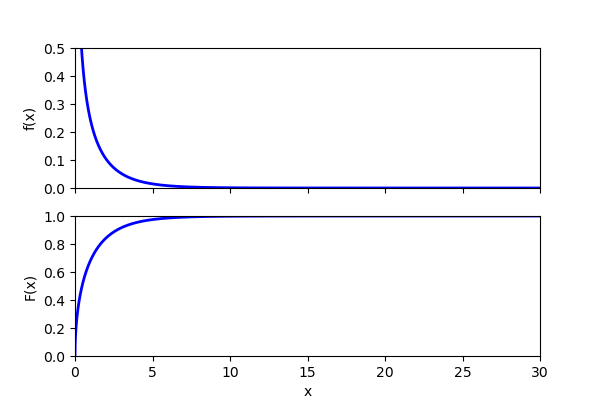

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
left = 0
right = 30

@interact(dof=widgets.IntSlider(min=1, max=right, step=1, value=1))
def plot_distribution(dof):
    frozen = chi2(dof)
    x = np.linspace(left, right, size)
    fx = frozen.pdf(x)
    Fx = frozen.cdf(x)
    ax1.clear()
    ax2.clear()
    ax2.set_xlim(left, right)
    ax1.set_ylim(0, 0.5)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel('F(x)')
    ax1.plot(x, fx, color='b', linestyle='-', linewidth=2)
    ax2.plot(x, Fx, color='b', linestyle='-', linewidth=2)
    mean, variance = chi2.stats(dof, moments='mv')
    print('mean = {:.3f}, variance = {:.3f}'.format(mean, variance))